In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries 

In [24]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.applications import InceptionResNetV2

## loading the dataset

In [25]:
training_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/train'
test_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/test'
validate_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/validation'

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1./255,
                                      )

train_generator = train_datagen.flow_from_directory(
    training_dir, 
    target_size = (150,150), 
    class_mode = 'binary',
    batch_size = 20
)

validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size =(150,150),
    class_mode = 'binary',
    batch_size = 20

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
convo_base = InceptionResNetV2(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

In [28]:
convo_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_406 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_406 (BatchN (None, 74, 74, 32)   96          conv2d_406[0][0]                 
__________________________________________________________________________________________________
activation_406 (Activation)     (None, 74, 74, 32)   0           batch_normalization_406[0][0]    
________________________________________________________________________________

## Building the model

In [29]:
model = models.Sequential()
model.add(convo_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
                          


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_2 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               7078400   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 61,415,649
Trainable params: 61,355,105
Non-trainable params: 60,544
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [32]:
check_point = keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/tensorflow/Untitled Folder/CNN_InceptionResNetV2_Project_Model-{epoch:02d}.h5")

## Training the model 

In [33]:
trained_model = model.fit(train_generator,
                          validation_data=validate_generator,
                          steps_per_epoch=100,
                          epochs=20,
                          validation_steps=50,
                          callbacks=[check_point])

Epoch 1/20
100/100 [==============================] - 165s 1s/step - loss: 0.4334 - acc: 0.8210 - val_loss: 0.2752 - val_acc: 0.9580
Epoch 2/20
100/100 [==============================] - 27s 274ms/step - loss: 0.2223 - acc: 0.9120 - val_loss: 1.3640 - val_acc: 0.9380
Epoch 3/20
100/100 [==============================] - 27s 272ms/step - loss: 0.1725 - acc: 0.9365 - val_loss: 0.5096 - val_acc: 0.9590
Epoch 4/20
100/100 [==============================] - 28s 274ms/step - loss: 0.1640 - acc: 0.9475 - val_loss: 2.8544 - val_acc: 0.9590
Epoch 5/20
100/100 [==============================] - 28s 275ms/step - loss: 0.0952 - acc: 0.9620 - val_loss: 2.2565 - val_acc: 0.9660
Epoch 6/20
100/100 [==============================] - 28s 274ms/step - loss: 0.1411 - acc: 0.9665 - val_loss: 2.3587 - val_acc: 0.9470
Epoch 7/20
100/100 [==============================] - 27s 273ms/step - loss: 0.1187 - acc: 0.9690 - val_loss: 14.1538 - val_acc: 0.9260
Epoch 8/20
100/100 [==============================] - 27

## Visualising the training 

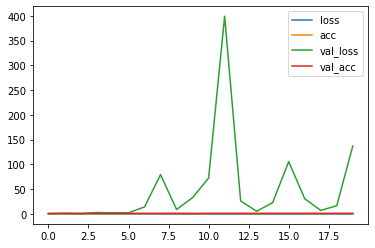

In [34]:
pd.DataFrame(trained_model.history).plot()

## Evaluating the model 

In [35]:
test_generator = validate_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    class_mode = 'binary',
    batch_size = 20

)

Found 1010 images belonging to 2 classes.


In [36]:
model.evaluate(test_generator,steps =50)

50/50 [==============================] - 274s 6s/step - loss: 67.8862 - acc: 0.9560


[67.88623809814453, 0.9559999704360962]

## Saving the model 

In [37]:
model.save('/content/drive/MyDrive/tensorflow/Untitled Folder/v4.h5')